In [1]:
from __future__ import print_function
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
import glob

#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
#matplotlib.rcParams['figure.figsize']= (20.0, 10.0) # larger image


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]

matplotlib version: 3.3.3
pandas version: 1.1.4
numpy version: 1.19.4
seaborn version: 0.11.0


### Load the data

In [2]:
root_path = '../2-Run1'  # The path to the directory containing the systems

igbs = ['igb1', 'igb2', 'igb5', 'igb7', 'igb8']  # Each of the systems as named in their directory

ffs = ['ff94','ff96','ff98','ff99', 'ff99SB', 'ff99SBildn', 'ff99SBnmr', 'ff03.r1', 'ff14SB', \
       'ff14SBonlysc','ff14ipq','fb15','ff15ipq']  # The name of the state directories



filename_pattern = 'helicity.dat'  # The glob to match the data files to read

dfs = {}  # Mapping of system name to list of state DataFrames

igbff_all = []
for ff in ffs:
    #igbff_all = []
    for igb in igbs:
        direc=igb + '_'+ ff
        # For each system and state, grab all the data files that match the glob
        file_glob = os.path.join(root_path, direc, filename_pattern)
        files = glob.glob(file_glob)
        for f in files:
            # Read each into a file to be put into a dict
            df = pd.read_csv(f, sep=r'\s+', skiprows=2501, names=['Frame', 'Fraction helicity'])
            df[r'Time ($\mu$s)'] = (df['Frame']-2501)/10000
            df['Helicity (%)'] = df['Fraction helicity']*100*33/31
#             df['Mouving average']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).mean()
#             df['Mouving std']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).std()
#             df['av-std']=df['Mouving average']-df['Mouving std']
#             df['av+std']=df['Mouving average']+df['Mouving std']
            
            df['igb'] = igb
            df['ff'] = ff
            df['ffigb'] = '{0} {1}'.format(ff, igb)
            df['igbff'] = '{0} {1}'.format(igb, ff)
            igbff_all.append(df)
df_total = pd.concat(igbff_all)


In [3]:
df_1ns=df_total.iloc[::10]


In [4]:
df_1ns['Mouving average']=pd.Series.rolling(df_1ns['Helicity (%)'],window=50,center=False).mean()
df_1ns['Mouving std']=pd.Series.rolling(df_1ns['Helicity (%)'],window=50,center=False).std()
df_1ns['av-std']=df_1ns['Mouving average']-df_1ns['Mouving std']
df_1ns['av+std']=df_1ns['Mouving average']+df_1ns['Mouving std']

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [5]:
df_1ns=df_1ns.reindex(columns=['Frame', 'Fraction helicity', r'Time ($\mu$s)','Helicity (%)',
                              'igb','ff','ffigb','igbff','Mouving average', 'Mouving std', 
                              'av-std','av+std'])

DSSP value of the fully helical version of the peptide:

In [5]:
90.9*33/31

96.76451612903227

### Helicity time series

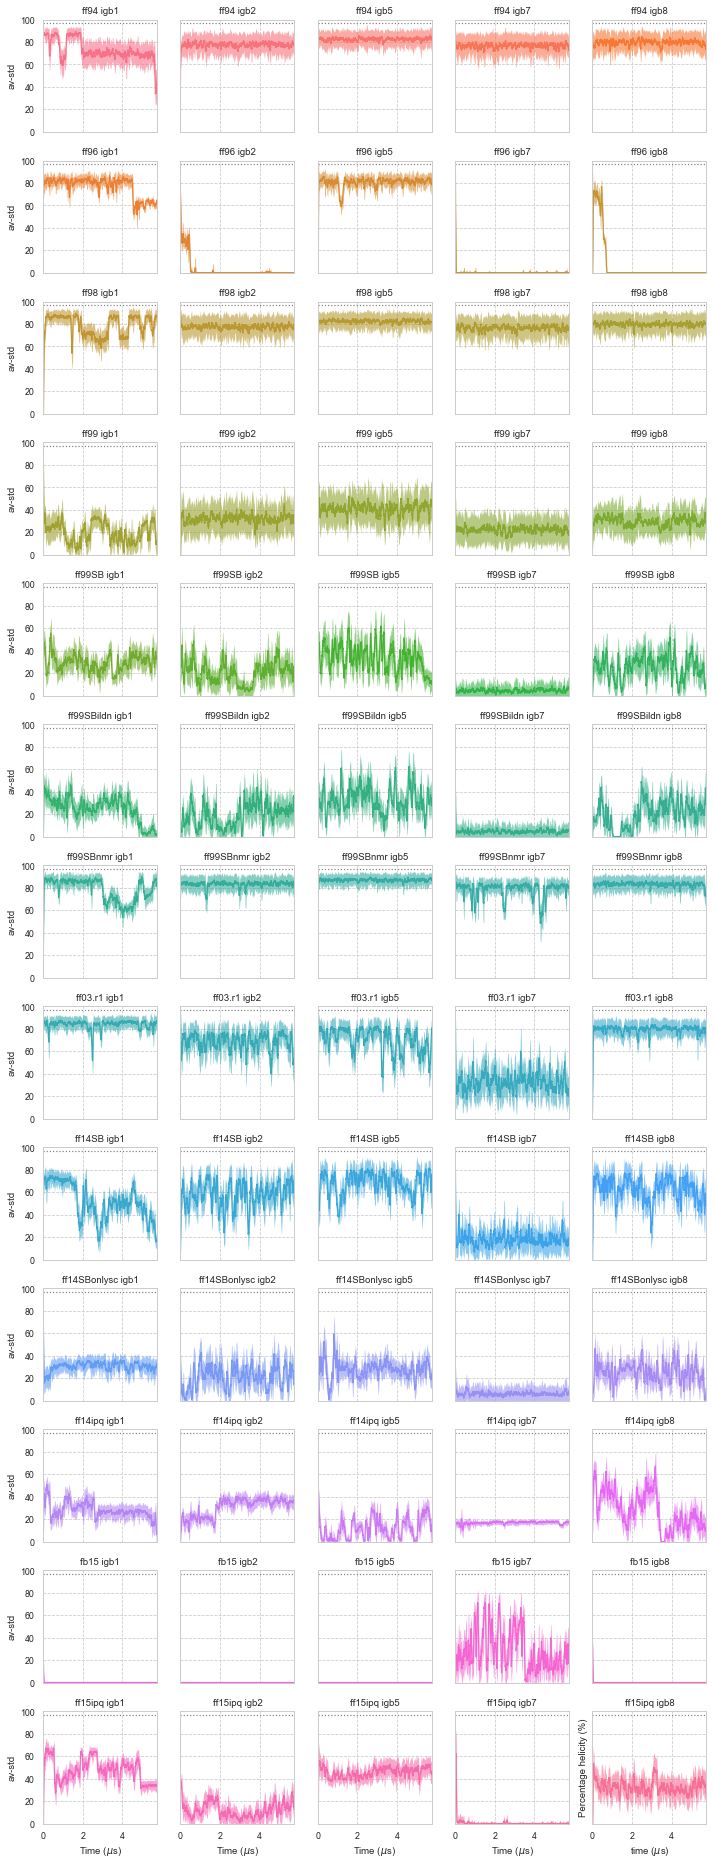

In [11]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_1ns, col="ffigb", col_wrap=5, hue="ffigb", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.76, ls=":", c=".5") # 90.9*33/31

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average').set_titles("{col_name}")
grid.map(plt.fill_between, r'Time ($\mu$s)','av-std', 'av+std', alpha=0.6, lw=0).set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 5.75) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
plt.ylabel('Percentage helicity (%)')
plt.tight_layout()
plt.savefig('./plots/helicity_ts_av_sd.pdf')
plt.savefig('./plots/helicity_ts_av_sd.png', dpi=300)


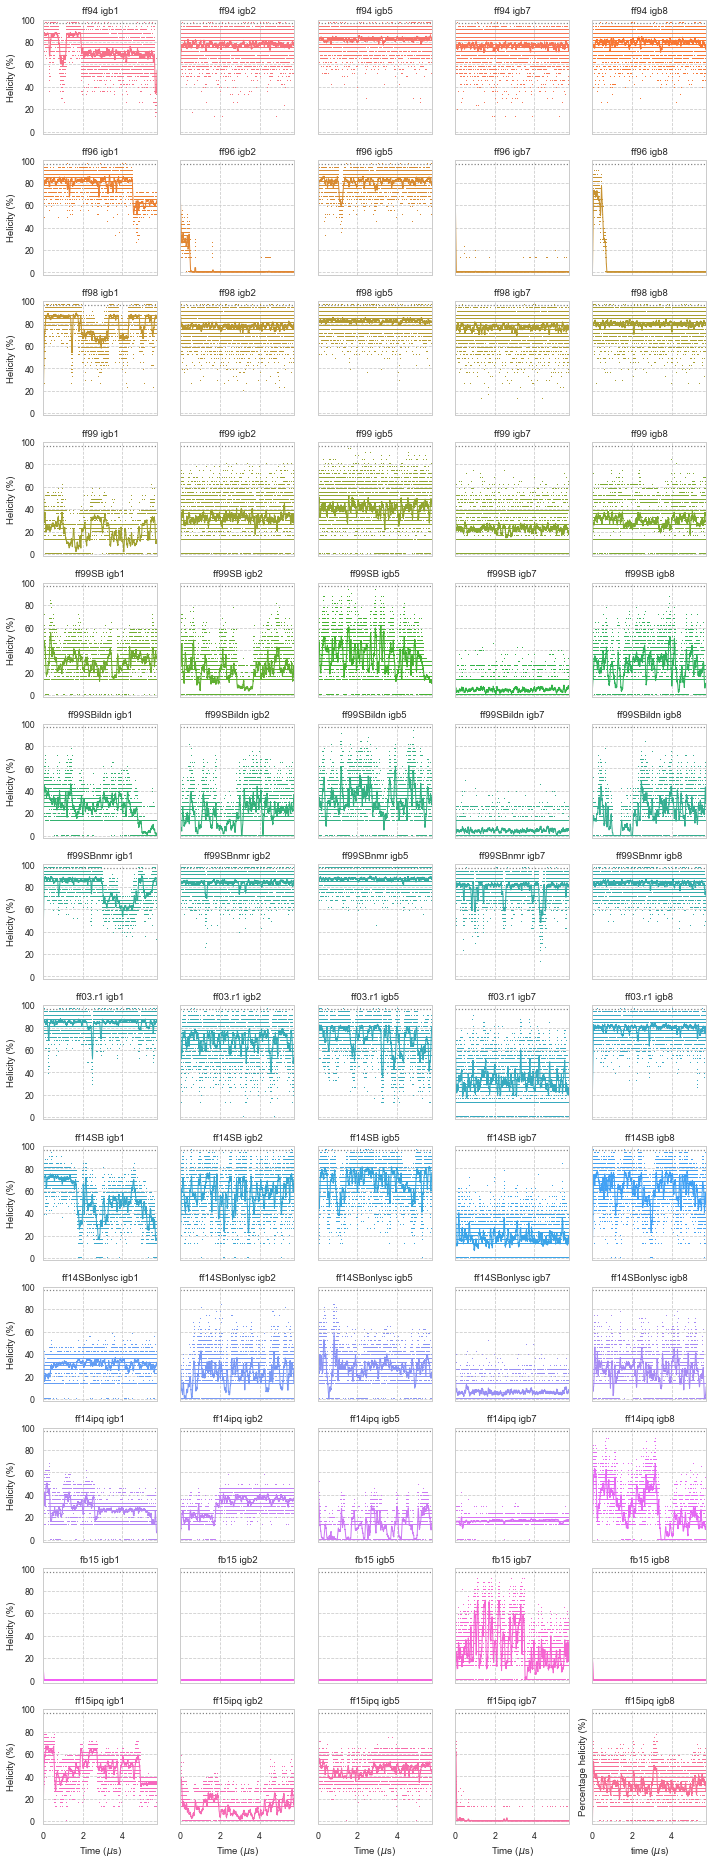

In [14]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_1ns, col="ffigb", col_wrap=5, hue="ffigb", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.76, ls=":", c=".5") # 90.9*33/31

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average', lw=1).set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=1, ls='',ms=1, marker=',').set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 5.75) , ylim=(-2, 100))
plt.xlabel(r'time ($\mu$s)')
plt.ylabel('Percentage helicity (%)')
plt.savefig('./plots/helicity_ts_av_data.pdf')
plt.savefig('./plots/helicity_ts_av_data.png', dpi=600)
plt.tight_layout()

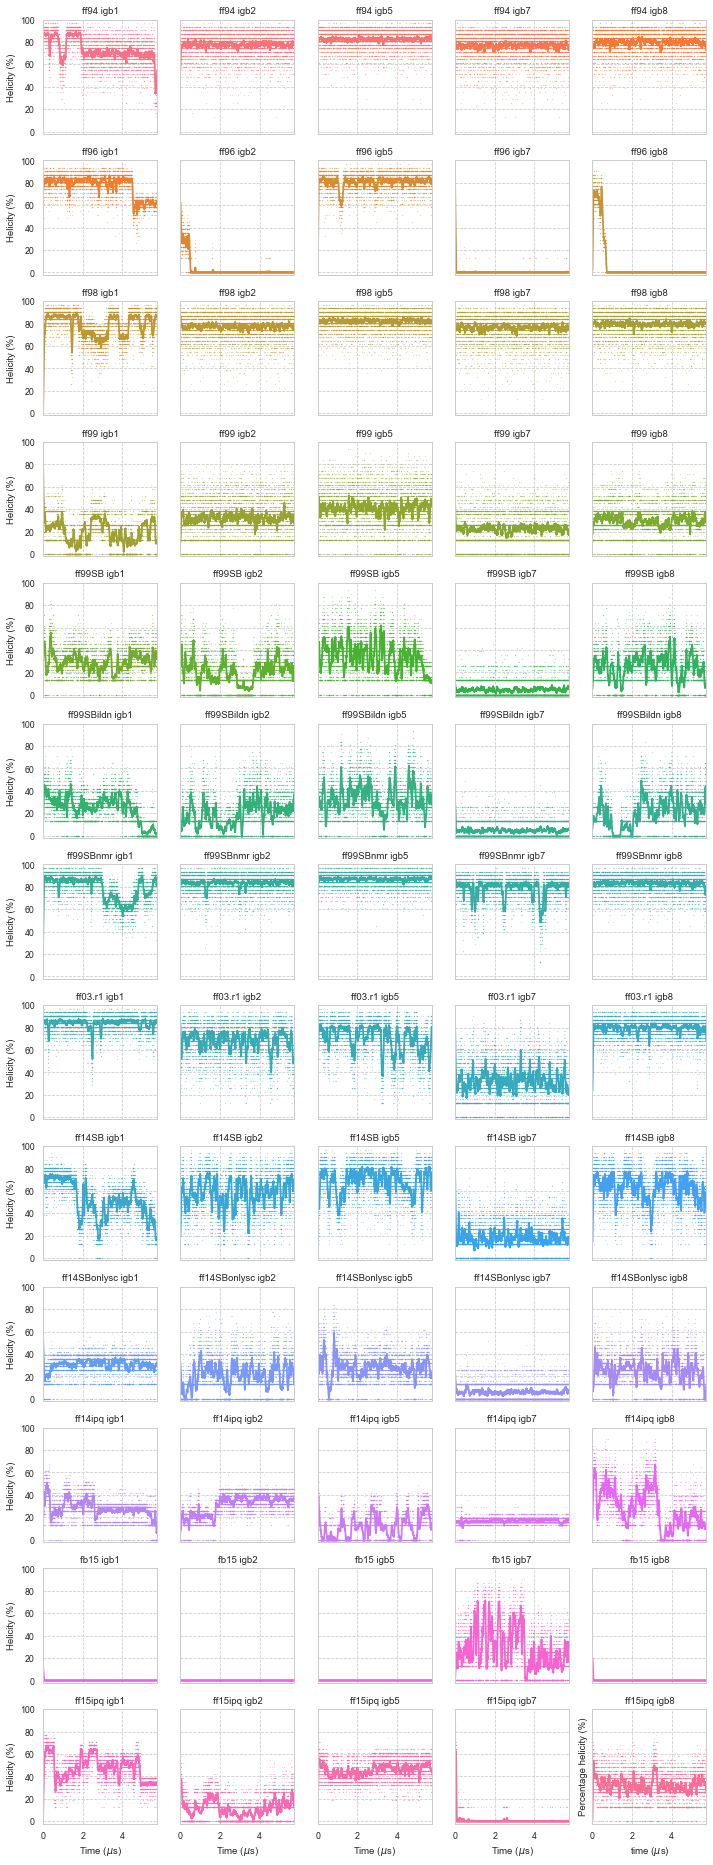

In [6]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_1ns, col="ffigb", col_wrap=5, hue="ffigb", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
# grid.map(plt.axhline, y=96.76, ls=":", c=".5") # 90.9*33/31

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average', lw=1.75).set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=1, ls='',ms=0.25, marker='.').set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 5.75) , ylim=(-2, 100))
plt.xlabel(r'time ($\mu$s)')
plt.ylabel('Percentage helicity (%)')
plt.savefig('./plots/helicity_ts_av_data2.pdf')
plt.savefig('./plots/helicity_ts_av_data2.png', dpi=600)
plt.tight_layout()

### Helicity box plots

In the first plot, wiskers incorporate all the data:

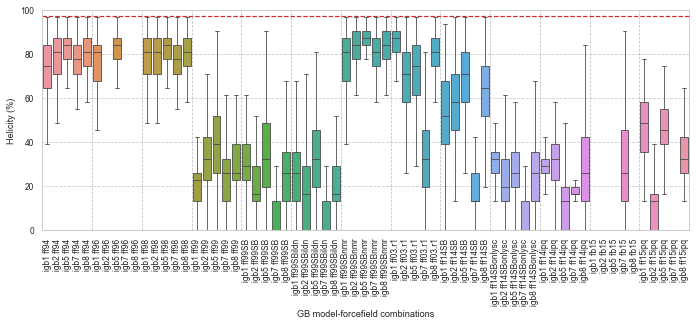

In [94]:

sns.set(context='paper', style='whitegrid', palette=sns.color_palette("tab10"), font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(9.75, 4.6))

plt.axvline(x=4.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=9.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=14.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=19.5, ls="--", c=".5", lw=0.75, alpha=0.5)
plt.axvline(x=24.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=29.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=34.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=39.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=44.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=49.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=54.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=59.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=64.5, ls="--", c=".5", lw=0.75, alpha=0.5) 

plt.axhline(y=97, ls="--", c='tab:red', alpha=1 )

ax=sns.boxplot(x='igbff', y='Helicity (%)',  data=df_1ns, fliersize=0, linewidth=0.8,
               showmeans=False
#                meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"}
              )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('GB model-forcefield combinations')


# ax.set_aspect(.25)
plt.tight_layout()
# ax.get_legend().remove()
plt.savefig('./plots/helicity_boxplot.pdf')
plt.savefig('./plots/helicity_boxplot.png', dpi=300)

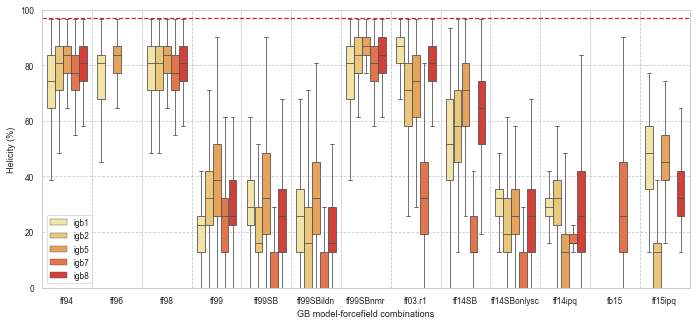

In [95]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("YlOrRd"), font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(9.75, 4.6))
plt.axvline(x=0.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=1.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=2.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=3.5, ls="--", c=".5", lw=0.75, alpha=0.5)
plt.axvline(x=4.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=5.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=6.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=7.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=8.5, ls="--", c=".5", lw=0.75, alpha=0.5)
plt.axvline(x=9.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=10.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=11.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=12.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
# plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
plt.axhline(y=97, ls="--", c='tab:red', alpha=1 )

ax=sns.boxplot(x='ff', y='Helicity (%)',hue='igb',  data=df_1ns, fliersize=0, linewidth=0.8,
               showmeans=False,dodge=True, width=0.8,
#                meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"}
              )
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('GB model-forcefield combinations')


ax.legend(loc='lower left')
# ax.set_aspect(.25)
plt.tight_layout()
plt.savefig('./plots/helicity_boxplot_2.pdf')
plt.savefig('./plots/helicity_boxplot_2.png', dpi=300)

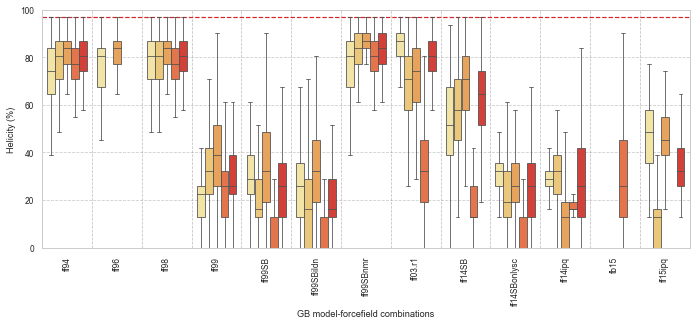

In [96]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("YlOrRd"), font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(9.75, 4.6))

plt.axvline(x=0.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=1.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=2.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=3.5, ls="--", c=".5", lw=0.75, alpha=0.5)
plt.axvline(x=4.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=5.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=6.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=7.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=8.5, ls="--", c=".5", lw=0.75, alpha=0.5)
plt.axvline(x=9.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=10.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=11.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=12.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
# plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
plt.axhline(y=97, ls="--", c='tab:red', alpha=1 )
ax=sns.boxplot(x='ff', y='Helicity (%)',hue='igb',  data=df_1ns, fliersize=0, linewidth=0.8,
               showmeans=False,dodge=True, width=0.8,
#                meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"}
              )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('GB model-forcefield combinations')


ax.get_legend().remove()
# ax.set_aspect(.25)
plt.tight_layout()
plt.savefig('./plots/helicity_boxplot_2_nolegend.pdf')
plt.savefig('./plots/helicity_boxplot_2_nolegend.png', dpi=300)

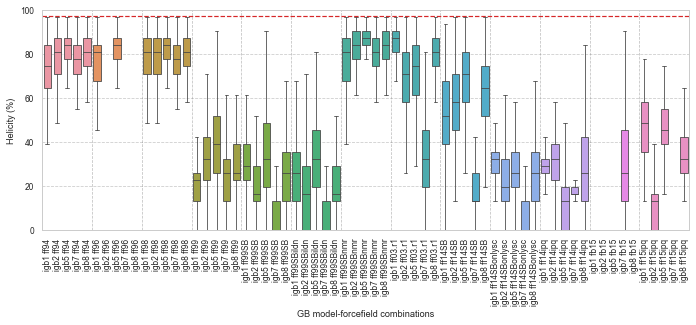

In [99]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("tab10"), font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(9.75, 4.6))

plt.axvline(x=4.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=9.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=14.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=19.5, ls="--", c=".5", lw=0.75, alpha=0.5)
plt.axvline(x=24.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=29.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=34.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=39.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=44.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=49.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=54.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=59.5, ls="--", c=".5", lw=0.75, alpha=0.5) 
plt.axvline(x=64.5, ls="--", c=".5", lw=0.75, alpha=0.5) 

plt.axhline(y=97, ls="--", c='tab:red', alpha=1 )

ax=sns.boxplot(x='igbff', y='Helicity (%)', hue='ff',  data=df_1ns, fliersize=0, linewidth=0.8,
               showmeans=False, dodge=False, width=0.75
#                meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"}
              )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('GB model-forcefield combinations')

ax.get_legend().remove()
# ax.set_aspect(.25)
plt.tight_layout()
plt.savefig('./plots/helicity_boxplot4.pdf')
plt.savefig('./plots/helicity_boxplot4.png', dpi=300)

In [100]:
pd.set_option('display.max_rows', df_1ns.shape[0]+1)
print(df_1ns.groupby('ffigb')['Helicity (%)'].median())

ffigb
fb15 igb1             0.000000
fb15 igb2             0.000000
fb15 igb5             0.000000
fb15 igb7            25.761290
fb15 igb8             0.000000
ff03.r1 igb1         87.077419
ff03.r1 igb2         71.003226
ff03.r1 igb5         74.196774
ff03.r1 igb7         32.254839
ff03.r1 igb8         80.690323
ff14SB igb1          51.629032
ff14SB igb2          58.016129
ff14SB igb5          71.003226
ff14SB igb7          12.880645
ff14SB igb8          64.509677
ff14SBonlysc igb1    32.254839
ff14SBonlysc igb2    19.374194
ff14SBonlysc igb5    25.761290
ff14SBonlysc igb7     0.000000
ff14SBonlysc igb8    25.761290
ff14ipq igb1         29.061290
ff14ipq igb2         32.254839
ff14ipq igb5         12.880645
ff14ipq igb7         16.180645
ff14ipq igb8         25.761290
ff15ipq igb1         48.435484
ff15ipq igb2         12.880645
ff15ipq igb5         45.135484
ff15ipq igb7          0.000000
ff15ipq igb8         32.254839
ff94 igb1            74.196774
ff94 igb2            80.690323
ff